In [79]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [80]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [132]:
X_train = []
y_train = [] 

data = pd.read_csv('./data/dados_finais_300.csv', header=None)

X = data.iloc[:, :9]
Y = data.iloc[:, 9] 

data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1,0,1,0,1,0,-1,1,0,hasgame
1,-1,0,1,0,0,1,1,1,0,hasgame
2,-1,0,1,0,1,-1,0,1,0,hasgame
3,-1,1,0,0,0,1,1,1,0,hasgame
4,-1,1,1,-1,0,0,1,1,0,hasgame


In [136]:
# Saber quantas linhas existem de cada classe
count_scenarios = pd.crosstab(index=data[9], columns="count")
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y)
count_scenarios



col_0,count
9,
hasgame,300
owin,294
tie,32
xwin,300


In [157]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

confusion_matrix(y_test, y_prediction, labels=['hasgame', 'owin', 'tie', 'xwin'])

array([[53,  6,  0,  1],
       [22, 34,  0,  3],
       [ 2,  0,  5,  0],
       [ 3, 11,  1, 45]])

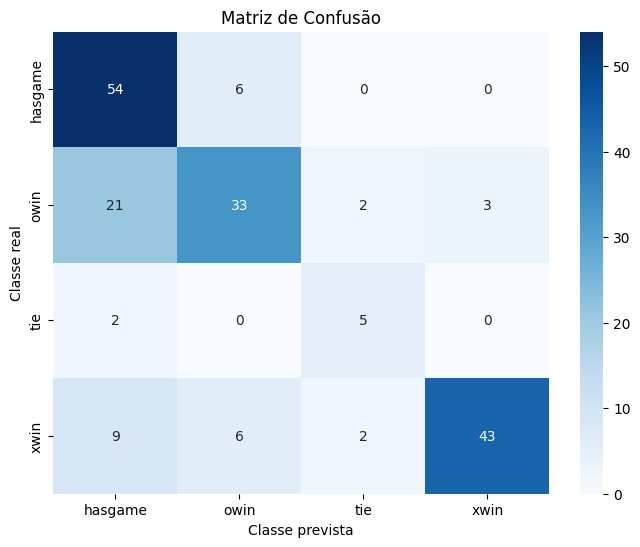

In [137]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)
mat = confusion_matrix(y_test, y_prediction, labels=['hasgame', 'owin', 'tie', 'xwin'])

# Nomes bonitinhos para o eixo
labels = ['hasgame', 'owin', 'tie', 'xwin']

# Plot usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Usando indexação padrão para arrays NumPy
ndtest = y_test.to_numpy()

acerto = 0
for i in range(len(y_prediction)):
    if y_prediction[i] == ndtest[i]:  # Indexação padrão para numpy arrays
        acerto += 1

print("Acuracia: ", acerto / len(y_prediction))
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

Acuracia:  0.7365591397849462
0.7365591397849462
              precision    recall  f1-score   support

     hasgame       0.66      0.88      0.76        60
        owin       0.67      0.58      0.62        59
         tie       0.83      0.71      0.77         7
        xwin       0.92      0.75      0.83        60

    accuracy                           0.74       186
   macro avg       0.77      0.73      0.74       186
weighted avg       0.75      0.74      0.74       186



<Figure size 1000x600 with 0 Axes>

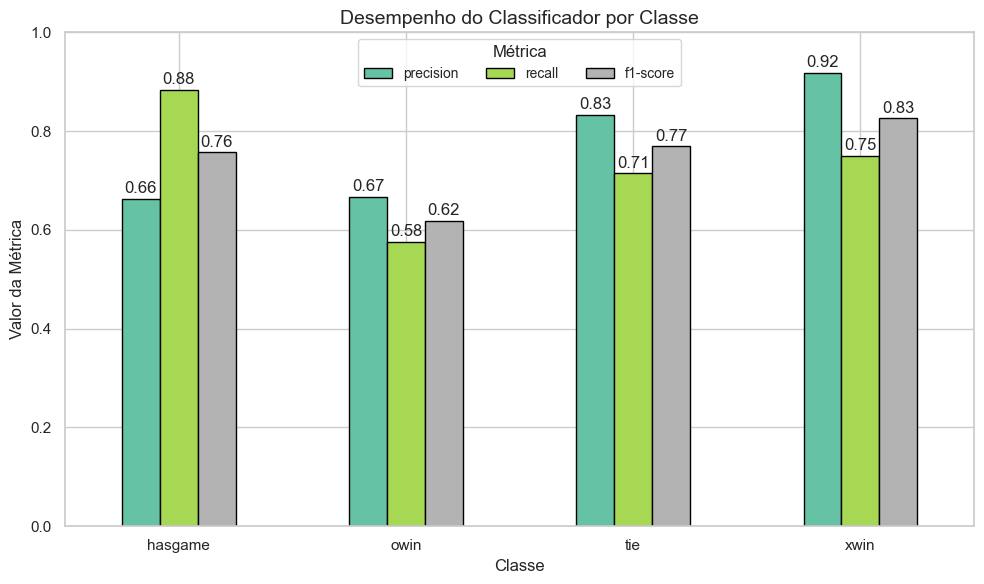

In [162]:
# Gera o classification_report como dicionário
report = classification_report(y_test, y_prediction, output_dict=True)

# Converte em DataFrame
df_report = pd.DataFrame(report).transpose()

# Filtra apenas as classes de interesse (ignora média geral e accuracy)
classes = ['hasgame', 'owin', 'tie', 'xwin']
df_filtered = df_report.loc[classes, ['precision', 'recall', 'f1-score']]

# Configura estilo do seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras
ax = df_filtered.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2', edgecolor='black')

# Adiciona valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# Ajusta elementos visuais
plt.title('Desempenho do Classificador por Classe', fontsize=14)
plt.ylabel('Valor da Métrica')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.legend(title='Métrica', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='small')
plt.tight_layout()
plt.show()

In [169]:
# Criar exemplos de teste adicionais
exemplos_teste = [
    {'resp': 'tie', 'value': [0, 1, 1, 1, 1, 0, 0, 0, 1]}, 
    {'resp': 'owin', 'value': [0, 0, 0,1, 1, -1,-1, -1, 1]},  
    {'resp': 'hasgame', 'value': [-1, 1, 1,0, 0, -1,0, 1, 1]}, 
    {'resp': 'xwin', 'value': [1, 0, 0,1, 1, 1, 0, -1, 0]}, 
]

# Iterar sobre os exemplos de teste
for i, exemplo_teste in enumerate(exemplos_teste, start=1):
    # Predição da classe
    resultado = knn.predict(np.array(exemplo_teste['value']).reshape(1, -1))
    print(f"Exemplo {i}: Classe prevista: {resultado[0]}")
    print(f"Tabuleiro: {exemplo_teste}")

    # Probabilidades por classe
    probabilidades = knn.predict_proba(np.array(exemplo_teste['value']).reshape(1, -1))
    print(f"Probabilidades por classe:")
    print(" hasgame: {:.2f}, owin: {:.2f}, tie: {:.2f}, xwin: {:.2f}".format(*probabilidades[0]))

    classe_real = exemplo_teste['resp']
    acerto = resultado[0] == classe_real
    print(f"Classe real: {classe_real}, Acerto: {acerto}")
    print()


Exemplo 1: Classe prevista: tie
Tabuleiro: {'resp': 'tie', 'value': [0, 1, 1, 1, 1, 0, 0, 0, 1]}
Probabilidades por classe:
 hasgame: 0.00, owin: 0.14, tie: 0.86, xwin: 0.00
Classe real: tie, Acerto: True

Exemplo 2: Classe prevista: owin
Tabuleiro: {'resp': 'owin', 'value': [0, 0, 0, 1, 1, -1, -1, -1, 1]}
Probabilidades por classe:
 hasgame: 0.14, owin: 0.57, tie: 0.00, xwin: 0.29
Classe real: owin, Acerto: True

Exemplo 3: Classe prevista: owin
Tabuleiro: {'resp': 'hasgame', 'value': [-1, 1, 1, 0, 0, -1, 0, 1, 1]}
Probabilidades por classe:
 hasgame: 0.14, owin: 0.43, tie: 0.14, xwin: 0.29
Classe real: hasgame, Acerto: False

Exemplo 4: Classe prevista: owin
Tabuleiro: {'resp': 'xwin', 'value': [1, 0, 0, 1, 1, 1, 0, -1, 0]}
Probabilidades por classe:
 hasgame: 0.00, owin: 0.43, tie: 0.14, xwin: 0.43
Classe real: xwin, Acerto: False



In [163]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [172]:
from tabulate import tabulate
import numpy as np

exemplos_teste = [
    {'resp': 'tie', 'value': [0, 1, 1, 1, 1, 0, 0, 0, 1]}, 
    {'resp': 'owin', 'value': [0, 0, 0,1, 1, -1,-1, -1, 1]},  
    {'resp': 'hasgame', 'value': [-1, 1, 1,0, 0, -1,0, 1, 1]}, 
    {'resp': 'xwin', 'value': [1, 0, 0,1, 1, 1, 0, -1, 0]}, 
]


cabecalho = ["Posições", "Classe Real", "Classe Prevista", "Acerto", "hasgame", "owin", "tie", "xwin"]
tabela_resultados = []

for exemplo in exemplos_teste:
    tabuleiro = np.array(exemplo['value']).reshape(1, -1)
    classe_real = exemplo['resp']
    resultado = knn.predict(tabuleiro)[0]
    probabilidades = knn.predict_proba(tabuleiro)[0]
    acerto = resultado == classe_real

    # Formatando a linha da tabela
    linha = [
        exemplo['value'],
        classe_real,
        resultado,
        "✅" if acerto else "❌",
        *["{:.2f}".format(p) for p in probabilidades]
    ]
    tabela_resultados.append(linha)

# Imprime tudo como uma tabela bonitinha
print(tabulate(tabela_resultados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════╤═══════════════╤═══════════════════╤══════════╤═══════════╤════════╤═══════╤════════╕
│ Posições                       │ Classe Real   │ Classe Prevista   │ Acerto   │   hasgame │   owin │   tie │   xwin │
╞════════════════════════════════╪═══════════════╪═══════════════════╪══════════╪═══════════╪════════╪═══════╪════════╡
│ [0, 1, 1, 1, 1, 0, 0, 0, 1]    │ tie           │ tie               │ ✅       │      0    │   0.14 │  0.86 │   0    │
├────────────────────────────────┼───────────────┼───────────────────┼──────────┼───────────┼────────┼───────┼────────┤
│ [0, 0, 0, 1, 1, -1, -1, -1, 1] │ owin          │ owin              │ ✅       │      0.14 │   0.57 │  0    │   0.29 │
├────────────────────────────────┼───────────────┼───────────────────┼──────────┼───────────┼────────┼───────┼────────┤
│ [-1, 1, 1, 0, 0, -1, 0, 1, 1]  │ hasgame       │ owin              │ ❌       │      0.14 │   0.43 │  0.14 │   0.29 │
├────────────────────────────────┼─────────

# 

In [ ]:
X_train = []
y_train = [] 

data = pd.read_csv('./data/dados_finais_300.csv', header=None)

X = data.iloc[:, :9]
Y = data.iloc[:, 9] 


data.head()


,0,1,2,3,4,5,6,7,8,9
0,-1,0,1,0,1,0,-1,1,0,hasgame
1,-1,0,1,0,0,1,1,1,0,hasgame
2,-1,0,1,0,1,-1,0,1,0,hasgame
3,-1,1,0,0,0,1,1,1,0,hasgame
4,-1,1,1,-1,0,0,1,1,0,hasgame


O melhor valor de k é: 7 com acurácia média de: 0.7189


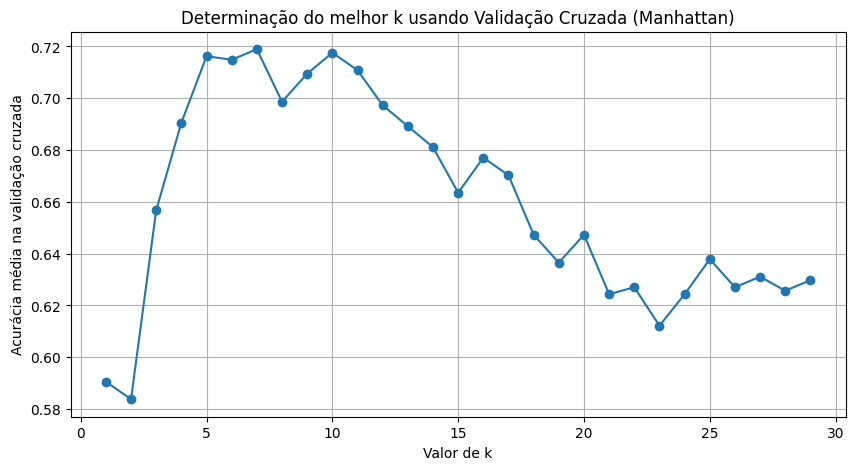

In [148]:
# Avaliar diferentes valores de k
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y)

k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
optimal_k = k_range[np.argmax(scores)]
print(f'O melhor valor de k é: {optimal_k} com acurácia média de: {max(scores):.4f}')

# Plotar gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média na validação cruzada')
plt.title('Determinação do melhor k usando Validação Cruzada (Manhattan)')
plt.grid(True)
plt.show()